In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


### cnn

In [85]:
from tensorflow import keras
from keras import models
from keras import layers

### ann

In [86]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense ,Dropout

In [87]:
# import data
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./ 255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True)

In [88]:
train_set = datagen.flow_from_directory('cats-dogs/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [89]:
train_set.image_shape

(64, 64, 3)

In [90]:
train_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [91]:
test_set = datagen.flow_from_directory('cats-dogs/test',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set.image_shape

test_set.classes


Found 2000 images belonging to 2 classes.


array([0, 0, 0, ..., 1, 1, 1])

In [92]:
# bild model 
cnn = tf.keras.models.Sequential()

# convulation
cnn.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=3,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation='relu',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPooling2D( pool_size=2,
    strides=2,
    padding='valid',
    data_format=None))


cnn.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=3,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation='relu',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPooling2D( pool_size=2,
    strides=2,
    padding='valid',
    data_format=None))

# flatting
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='sigmoid'))

In [93]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [94]:
cnn.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None)

In [95]:
cnn.fit( x=train_set,validation_data = test_set,
    epochs=25 )

Epoch 1/25


ValueError: in user code:

    File "C:\Users\fg\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\fg\anaconda3\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 128) vs (None, 1)).


In [75]:
# save modl
cnn.save('cats-dogs.h7')

INFO:tensorflow:Assets written to: cats-dogs.h7\assets


INFO:tensorflow:Assets written to: cats-dogs.h7\assets


1/1 [==============================] - 0s 56ms/step


array([[1.4882706e-35, 2.5916563e-15, 9.9841934e-01, 1.6055227e-12,
        1.0000000e+00, 8.4207359e-06, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 9.9999934e-01, 1.8282115e-19, 1.8396603e-04,
        1.0000000e+00, 9.9997401e-01, 1.9109400e-06, 1.0794255e-27,
        3.5231702e-30, 9.9996120e-01, 1.0000000e+00, 1.2455846e-14,
        2.0994992e-12, 1.0000000e+00, 1.0000000e+00, 2.2335743e-32,
        1.9435056e-23, 1.6963990e-14, 1.0000000e+00, 1.0000000e+00,
        9.9999994e-01, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        9.9999475e-01, 1.0000000e+00, 9.9989635e-01, 6.2954359e-06,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.3152213e-30,
        1.0000000e+00, 4.6441375e-09, 2.9633884e-07, 1.0000000e+00,
        9.6615839e-01, 1.8378382e-21, 9.9999982e-01, 1.0000000e+00,
        3.1654328e-16, 3.6734503e-04, 9.9999988e-01, 1.0000000e+00,
        5.5924115e-19, 9.9776924e-01, 1.0681565e-13, 3.2284904e-06,
        0.0000000e+00, 3.6263913e-16, 1.0000000e

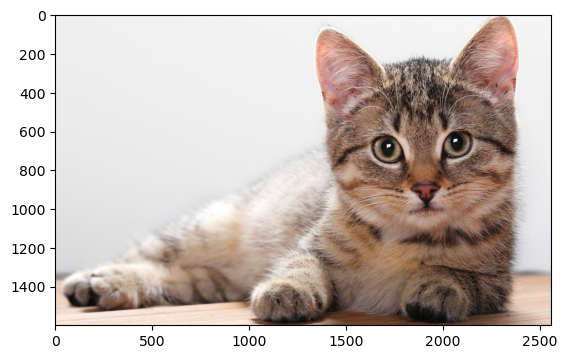

In [76]:
model = tf.keras.models.load_model('cats-dogs.h7')


##### Making a Single Prediction

test_img = mpimg.imread('cats-dogs/single_prediction/cat_or_dog_2.jpg')
plt.imshow(test_img)

test_img = tf.keras.utils.load_img('cats-dogs/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))

test_img

test_img = tf.keras.utils.img_to_array(test_img)

test_img

test_img = np.expand_dims(test_img, axis = 0)

model.predict(test_img)

In [77]:
model.predict(test_img)

1/1 [==============================] - 0s 21ms/step


array([[1.4882706e-35, 2.5916563e-15, 9.9841934e-01, 1.6055227e-12,
        1.0000000e+00, 8.4207359e-06, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 9.9999934e-01, 1.8282115e-19, 1.8396603e-04,
        1.0000000e+00, 9.9997401e-01, 1.9109400e-06, 1.0794255e-27,
        3.5231702e-30, 9.9996120e-01, 1.0000000e+00, 1.2455846e-14,
        2.0994992e-12, 1.0000000e+00, 1.0000000e+00, 2.2335743e-32,
        1.9435056e-23, 1.6963990e-14, 1.0000000e+00, 1.0000000e+00,
        9.9999994e-01, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        9.9999475e-01, 1.0000000e+00, 9.9989635e-01, 6.2954359e-06,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.3152213e-30,
        1.0000000e+00, 4.6441375e-09, 2.9633884e-07, 1.0000000e+00,
        9.6615839e-01, 1.8378382e-21, 9.9999982e-01, 1.0000000e+00,
        3.1654328e-16, 3.6734503e-04, 9.9999988e-01, 1.0000000e+00,
        5.5924115e-19, 9.9776924e-01, 1.0681565e-13, 3.2284904e-06,
        0.0000000e+00, 3.6263913e-16, 1.0000000e

1/1 [==============================] - 0s 17ms/step


array([[1826.8926, 1846.5277, 1942.3806, 1781.8   , 1826.15  , 1765.1967,
        1834.667 , 1965.0079, 1931.6107, 1844.0072, 1925.1279, 1922.0785,
        1661.3789, 1763.3212, 1785.0898, 1823.9998, 1857.134 , 1661.5945,
        1885.1416, 1739.862 , 1875.1245, 1770.0183, 1823.5944, 1739.7405,
        1954.576 , 1855.9877, 1888.089 , 1823.8928, 1904.9994, 1803.2626,
        2016.4407, 1896.7402, 1916.7205, 1716.3804, 1844.7814, 1706.7379,
        2046.1047, 1868.8547, 1917.7917, 2006.4296, 1812.5929, 1863.0729,
        1885.6315, 1874.873 , 1929.5035, 1966.399 , 1896.1954, 1922.2393,
        1758.8092, 1900.4005, 1888.706 , 1871.7976, 1894.3748, 1681.4938,
        1853.3678, 1933.8774, 1707.2234, 1948.234 , 1761.9679, 1808.9326,
        1891.8036, 1811.1838, 1949.6737, 1825.2585, 2113.753 , 1881.9521,
        1930.5288, 1872.0211, 1824.9098, 1708.9663, 1804.7921, 1821.0624,
        1697.1211, 1753.2798, 1755.9355, 1958.9176, 1754.6428, 1753.2717,
        1865.429 , 1748.6337, 1600.045

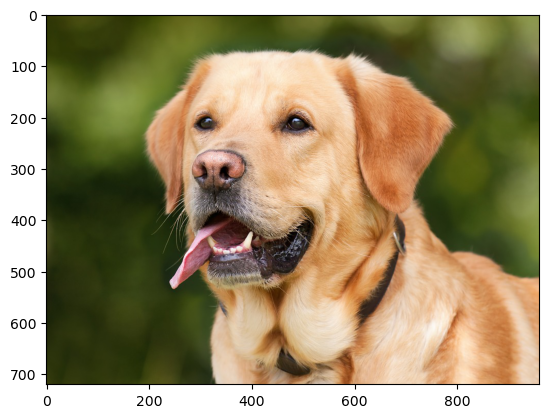

In [42]:
##### Making a Single Prediction

test_img = mpimg.imread('cats-dogs/single_prediction/cat_or_dog_1.jpg')
plt.imshow(test_img)

test_img = tf.keras.utils.load_img('cats-dogs/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

test_img


test_img = np.expand_dims(test_img, axis = 0)

model.predict(test_img)

In [ ]:
###################################################################################################################

In [63]:
model = tf.keras.models.load_model('cats-dogs.h7')

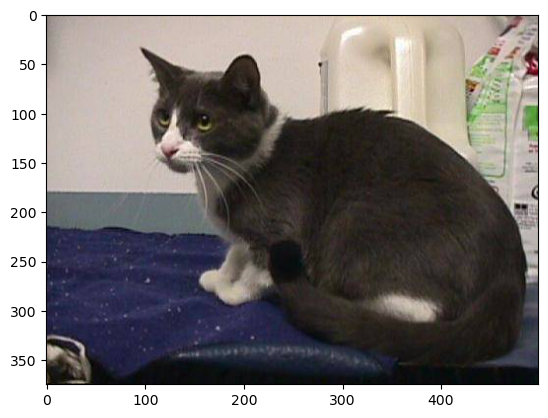

In [64]:
test_img = mpimg.imread('cats-dogs/single_prediction/cat_or_dog_3.jpg')
plt.imshow(test_img)

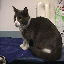

In [65]:
test_img = tf.keras.utils.load_img('cats-dogs/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))

test_img

In [66]:
test_img = tf.keras.utils.img_to_array(test_img)

test_img


array([[[147., 136., 130.],
        [167., 156., 150.],
        [174., 163., 157.],
        ...,
        [105.,  77.,  76.],
        [153., 142., 136.],
        [168., 157., 155.]],

       [[144., 133., 129.],
        [167., 156., 152.],
        [179., 168., 162.],
        ...,
        [154., 103., 108.],
        [186., 171., 166.],
        [153., 143., 141.]],

       [[155., 143., 143.],
        [170., 158., 158.],
        [180., 169., 163.],
        ...,
        [201., 173., 169.],
        [173., 173., 163.],
        [159., 141., 141.]],

       ...,

       [[ 27.,  26.,  21.],
        [ 32.,  33.,  35.],
        [ 49.,  45.,  36.],
        ...,
        [ 12.,  13.,  15.],
        [  8.,  11.,  18.],
        [ 14.,  16.,  29.]],

       [[ 37.,  31.,  17.],
        [ 21.,  19.,  20.],
        [ 18.,  15.,   8.],
        ...,
        [ 10.,  10.,  18.],
        [  8.,  12.,  13.],
        [  9.,  12.,  17.]],

       [[ 48.,  38.,  26.],
        [ 26.,  27.,  22.],
        [ 45.,  

In [67]:

test_img = np.expand_dims(test_img, axis = 0)

In [70]:
model.predict(test_img)

1/1 [==============================] - 0s 21ms/step


array([[688.07086, 716.9881 , 740.6945 , 679.4759 , 697.8763 , 660.4628 ,
        718.1209 , 722.67596, 733.4548 , 717.4516 , 721.5022 , 740.8842 ,
        635.2867 , 700.00305, 695.5975 , 707.41003, 719.92236, 620.2909 ,
        709.5362 , 693.1209 , 703.9721 , 679.81555, 700.70374, 684.60004,
        758.42456, 695.7341 , 717.95856, 686.9772 , 706.1702 , 683.6408 ,
        748.8152 , 713.1332 , 729.4443 , 656.25964, 727.7641 , 663.37305,
        756.7688 , 695.25183, 740.86676, 749.6784 , 709.7472 , 694.4198 ,
        727.77295, 715.3913 , 738.1619 , 721.06024, 713.12445, 719.9012 ,
        684.2737 , 703.0191 , 715.0789 , 691.6294 , 727.0369 , 653.5163 ,
        709.42523, 751.5936 , 679.99866, 716.1087 , 681.7431 , 674.2108 ,
        724.4455 , 703.9917 , 753.17444, 699.9516 , 770.1919 , 676.818  ,
        744.32855, 732.318  , 719.4517 , 631.15936, 674.94006, 711.1979 ,
        653.9841 , 684.70636, 679.47675, 736.8105 , 685.5007 , 706.1504 ,
        740.6798 , 672.72614, 624.0193